In [1]:
%load_ext autoreload
%autoreload 2

In [106]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from magnons.energies import AkBkAngle, hamiltonian_AB, get_E_and_ev
from magnons.yig import a, S, mu, J
from magnons.cgs import E_to_GHz

In [210]:
ky = 10**4
kz = 10**2
phi = np.radians(18)
alpha = np.radians(30)
N = 400
h = mu * 2500
eps = a**(-2)
A, B = AkBkAngle(ky,
                 kz,
                 phi,
                 alpha,
                 N=N,
                 J=J,
                 S=S,
                 h=h,
                 eps=eps,
                 a=a,
                 mu=mu)
mat = hamiltonian_AB(A, B)

In [206]:
D = np.block([[A, B],[B.T.conj(), A.T]])
K = linalg.cholesky(D, overwrite_a=True, check_finite=False, lower=False)
Ip = np.block([[np.identity(N), np.zeros((N,N))], [np.zeros((N,N)), -np.identity(N)]])
M = K @ Ip @ K.conj().T
E, U = linalg.eigh(M, overwrite_a=True, check_finite=False)

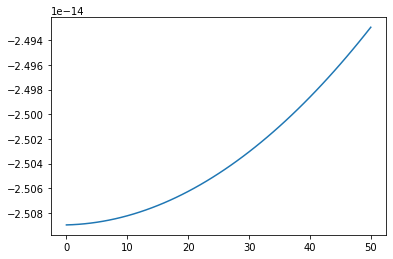

In [207]:
plt.plot(np.sort(E))

In [297]:
def quick(A, B):
    D = np.block([[A, B],[B.T, A.T]])
    N = A.shape[0]
    K = linalg.cholesky(D, overwrite_a=True, check_finite=False, lower=False)
    Ip = np.block([[np.identity(N), np.zeros((N,N))], [np.zeros((N,N)), -np.identity(N)]])
    M = K @ Ip @ K.conj().T
    E, U = linalg.eigh(M, overwrite_a=True, check_finite=False)
    E = Ip@E # note that linalg.eigh returns sorted eigenvalues
    E = np.abs(E) # we want only positive values anyway
    inverse_K = K.T.conj()
    ev = inverse_K@U@np.diag(E**(1/2))
    
    
    E = E[:N] * E_to_GHz
    ev = ev[:, :N]
    ev = ev * np.sqrt(np.sum(ev**2, axis=0)[np.newaxis,:])**(-1)
    return np.flip(E), np.flip(ev)

In [298]:
E, ev = quick(A,B)
Eold, evold = get_E_and_ev(True, mat, E_to_GHz)


8.535066434921193 8.535064710300846


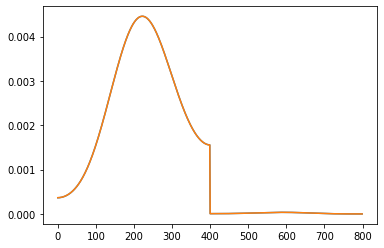

In [299]:
i = 1
print(E[i], Eold[i])
plt.plot(ev[:,i]**2)
plt.plot(evold[:,i]**2)


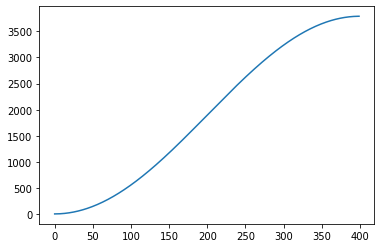

In [264]:
plt.plot(np.sort(E).real)

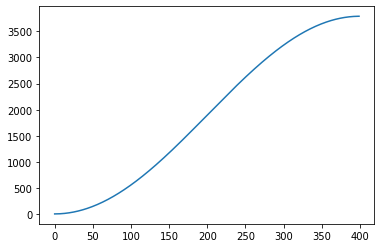

In [265]:
plt.plot(np.sort(Eold).real)

In [300]:
%%timeit 
mat = hamiltonian_AB(A, B)
linalg.eig(mat)

2.12 s ± 236 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [301]:
%%timeit 
quick(A,B)

739 ms ± 62.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
